In [76]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization library
import matplotlib.pyplot as plt # visualization library

#import plotly.plotly as py # visualization library
#import plotly.graph_objs as go # plotly graphical object
#from plotly.offline import init_notebook_mode, iplot # plotly offline mode
#init_notebook_mode(connected=True) 
import pandas as pd
from pathlib import Path


import kagglehub
path = kagglehub.dataset_download("usaf/world-war-ii")
aerial = pd.read_csv ((Path (path) / Path("operations.csv")))

aerial

C:\Users\Arath\AppData\Local\Temp\ipykernel_34808\158937099.py:20: DtypeWarning: Columns (7,8,11,13,31,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  aerial = pd.read_csv ((Path (path) / Path("operations.csv")))


,Mission ID,Mission Date,Theater of Operations,Country,Air Force,Unit ID,Aircraft Series,Callsign,Mission Type,Takeoff Base,...,Incendiary Devices Weight (Tons),Fragmentation Devices,Fragmentation Devices Type,Fragmentation Devices Weight (Pounds),Fragmentation Devices Weight (Tons),Total Weight (Pounds),Total Weight (Tons),Time Over Target,Bomb Damage Assessment,Source ID
0,1,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN
1,2,8/15/1943,PTO,USA,5 AF,400 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,9366.0
2,3,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN
3,4,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,7.5,NaN,NaN,NaN
4,5,8/15/1943,PTO,USA,5 AF,321 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,22585.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178276,178738,2/16/1945,CBI,USA,10 AF,89 FS,P47,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,35815.0
178277,178739,2/16/1945,CBI,USA,10 AF,90 FS,P47,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,35020.0
178278,178740,2/16/1945,CBI,USA,10 AF,90 FS,P47,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,35022.0
178279,178741,2/16/1945,PTO,NEW ZEALAND,RNZAF,NO. 22 SQUADRON RNZAF,F4U,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8000.0,4.0,NaN,NaN,NaN


1. Which day had most missions?

In [77]:


aerial_mission_date = aerial.groupby("Mission Date")["Mission ID"].count()
aerial_mission_date_df = aerial_mission_date.reset_index()
aerial_mission_date_df.columns = ["Mission Date", "Number of Missions"]
pd.DataFrame(aerial_mission_date_df).sort_values(by = "Number of Missions", ascending = False)


,Mission Date,Number of Missions
846,3/24/1945,896
948,4/15/1945,874
988,4/22/1945,862
928,4/11/1945,838
923,4/10/1945,778
...,...,...
1824,9/25/1939,1
79,1/24/1941,1
833,3/22/1942,1
1731,8/9/1941,1


In [78]:
# Ensure "Mission Date" is in datetime format
aerial["Mission Date"] = pd.to_datetime(aerial["Mission Date"])

aerial["Year-Month"] = aerial["Mission Date"].dt.to_period("M")

missions_per_month = aerial.groupby("Year-Month")["Mission ID"].count()

missions_per_month_df = missions_per_month.reset_index()

missions_per_month_df.columns = ["Month", "Number of Missions"]

missions_per_month_df = missions_per_month_df.sort_values(by="Number of Missions", ascending=False)

pd.DataFrame (missions_per_month_df.head(10))

,Month,Number of Missions
63,1945-04,14354
62,1945-03,13455
53,1944-06,9550
55,1944-08,9379
54,1944-07,8672
61,1945-02,8094
59,1944-12,7752
58,1944-11,7432
56,1944-09,7379
52,1944-05,7332


In [79]:
aerial = aerial[pd.isna(aerial.Country)==False]

In [80]:
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path
import re

longitude_min, longitude_max = -180, 180  # Longitude range
latitude_min, latitude_max = -90, 90     # Latitude range
# Drop rows out of latitude and longitude range
aerial["Takeoff Longitude"] = aerial["Takeoff Longitude"].apply(
    lambda x: re.sub(r"[A-Za-z]+", "", str(x)) if pd.notnull(x) else np.nan
)
aerial["Takeoff Latitude"] = aerial["Takeoff Latitude"].apply(
    lambda x: re.sub(r"[A-Za-z]+", "", str(x)) if pd.notnull(x) else np.nan
)

# Drop rows where 'Takeoff Latitude' is NaN or empty
aerial = aerial.dropna(subset=["Takeoff Latitude"])  # Drop NaN values
aerial = aerial[aerial["Takeoff Latitude"] != ""]   # Drop empty strings explicitly (if they exist)

# Drop rows where 'Takeoff Latitude' is NaN or empty
aerial = aerial.dropna(subset=["Takeoff Longitude"])  # Drop NaN values
aerial = aerial[aerial["Takeoff Longitude"] != ""]   # Drop empty strings explicitly (if they exist)

aerial["Takeoff Longitude"] = aerial["Takeoff Longitude"].apply(
    lambda x: float(x)
)
aerial["Takeoff Latitude"] = aerial["Takeoff Latitude"].apply(
    lambda x: float (x)
)



aerial["Takeoff Longitude"] = aerial["Takeoff Longitude"].apply(
    lambda x: re.sub(r"[A-Za-z]+", "", str(x)) if pd.notnull(x) else np.nan
)
aerial["Target Latitude"] = aerial["Target Latitude"].apply(
    lambda x: re.sub(r"[A-Za-z]+", "", str(x)) if pd.notnull(x) else np.nan
)

# Drop rows where 'Takeoff Latitude' is NaN or empty
aerial = aerial.dropna(subset=["Target Latitude"])  # Drop NaN values
aerial = aerial[aerial["Target Latitude"] != ""]   # Drop empty strings explicitly (if they exist)

# Drop rows where 'Takeoff Latitude' is NaN or empty
aerial = aerial.dropna(subset=["Target Longitude"])  # Drop NaN values
aerial = aerial[aerial["Target Longitude"] != ""]   # Drop empty strings explicitly (if they exist)

aerial["Target Longitude"] = aerial["Target Longitude"].apply(
    lambda x: float(x)
)
aerial["Target Latitude"] = aerial["Target Latitude"].apply(
    lambda x: float (x)
)

C:\Users\Arath\AppData\Local\Temp\ipykernel_34808\1478677800.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aerial["Takeoff Longitude"] = aerial["Takeoff Longitude"].apply(
C:\Users\Arath\AppData\Local\Temp\ipykernel_34808\1478677800.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aerial["Takeoff Latitude"] = aerial["Takeoff Latitude"].apply(


In [81]:
aerial = aerial[
    (aerial["Takeoff Longitude"] >= longitude_min) & 
    (aerial["Takeoff Longitude"] <= longitude_max) &
    (aerial["Takeoff Latitude"] >= latitude_min) & 
    (aerial["Takeoff Latitude"] <= latitude_max)
]
aerial.to_csv("Filtered_with_coordinates.csv", index=False)
world = gpd.read_file(Path("ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp"))

# Filter for Europe and North Africa based on coordinates
europe_north_africa = world.cx[-10:120, 0:90]  # Longitude: -30 to 60, Latitude: 15 to 50

europe_north_africa["bases"] = np.random.randint(0, 100, len(europe_north_africa))

europe_north_africa

C:\Users\Arath\AppData\Roaming\Python\Python312\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry,bases
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",72
5,Admin-0 country,1,3,Kazakhstan,KA1,1,1,Sovereignty,1,Kazakhstan,...,None,None,None,None,None,None,None,None,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",49
6,Admin-0 country,1,3,Uzbekistan,UZB,0,2,Sovereign country,1,Uzbekistan,...,None,None,None,None,None,None,None,None,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",49
8,Admin-0 country,1,2,Indonesia,IDN,0,2,Sovereign country,1,Indonesia,...,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",91
11,Admin-0 country,1,2,Democratic Republic of the Congo,COD,0,2,Sovereign country,1,Democratic Republic of the Congo,...,None,None,None,None,None,None,None,None,"POLYGON ((29.34 -4.49998, 29.51999 -5.41998, 2...",12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,Admin-0 country,1,6,North Macedonia,MKD,0,2,Sovereign country,1,North Macedonia,...,None,None,None,None,None,None,None,None,"POLYGON ((22.38053 42.32026, 22.88137 41.9993,...",16
172,Admin-0 country,1,5,Republic of Serbia,SRB,0,2,Sovereign country,1,Republic of Serbia,...,None,None,None,None,None,None,None,None,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",70
173,Admin-0 country,1,6,Montenegro,MNE,0,2,Sovereign country,1,Montenegro,...,None,None,None,None,None,None,None,None,"POLYGON ((20.0707 42.58863, 19.80161 42.50009,...",42
174,Admin-0 country,1,6,Kosovo,KOS,0,2,Disputed,1,Kosovo,...,Unrecognized,Admin-0 country,Unrecognized,Admin-0 country,Admin-0 country,Admin-0 country,Admin-0 country,Unrecognized,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",79


C:\Users\Arath\AppData\Local\Temp\ipykernel_34808\2430022463.py:3: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  europe_north_africa.plot(ax=ax, color="lightblue", edgecolor="black", column="bases", cmap="plasma")


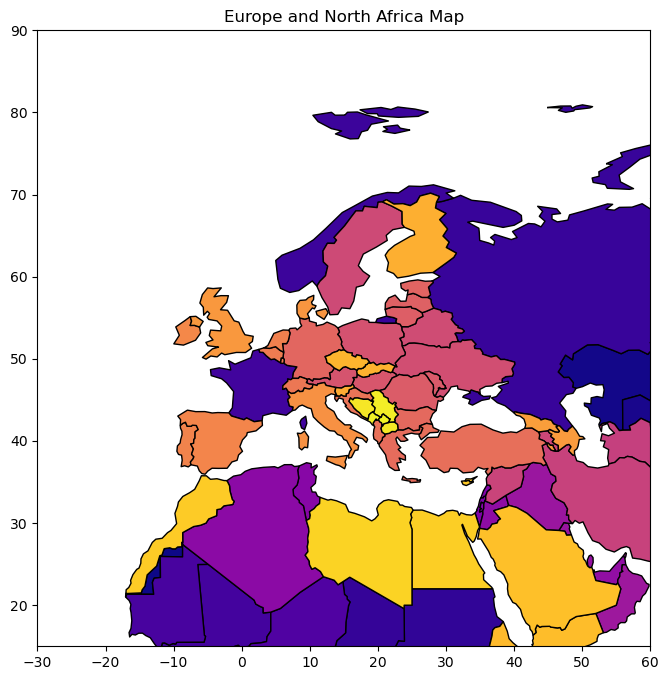

In [82]:
# Plot the filtered map
fig, ax = plt.subplots(figsize=(10, 8))
europe_north_africa.plot(ax=ax, color="lightblue", edgecolor="black", column="bases", cmap="plasma")
ax.set_xlim(-30, 60)  # Longitude range
ax.set_ylim(15, 90)   # Latitude range
ax.set_title("Europe and North Africa Map")
plt.show()

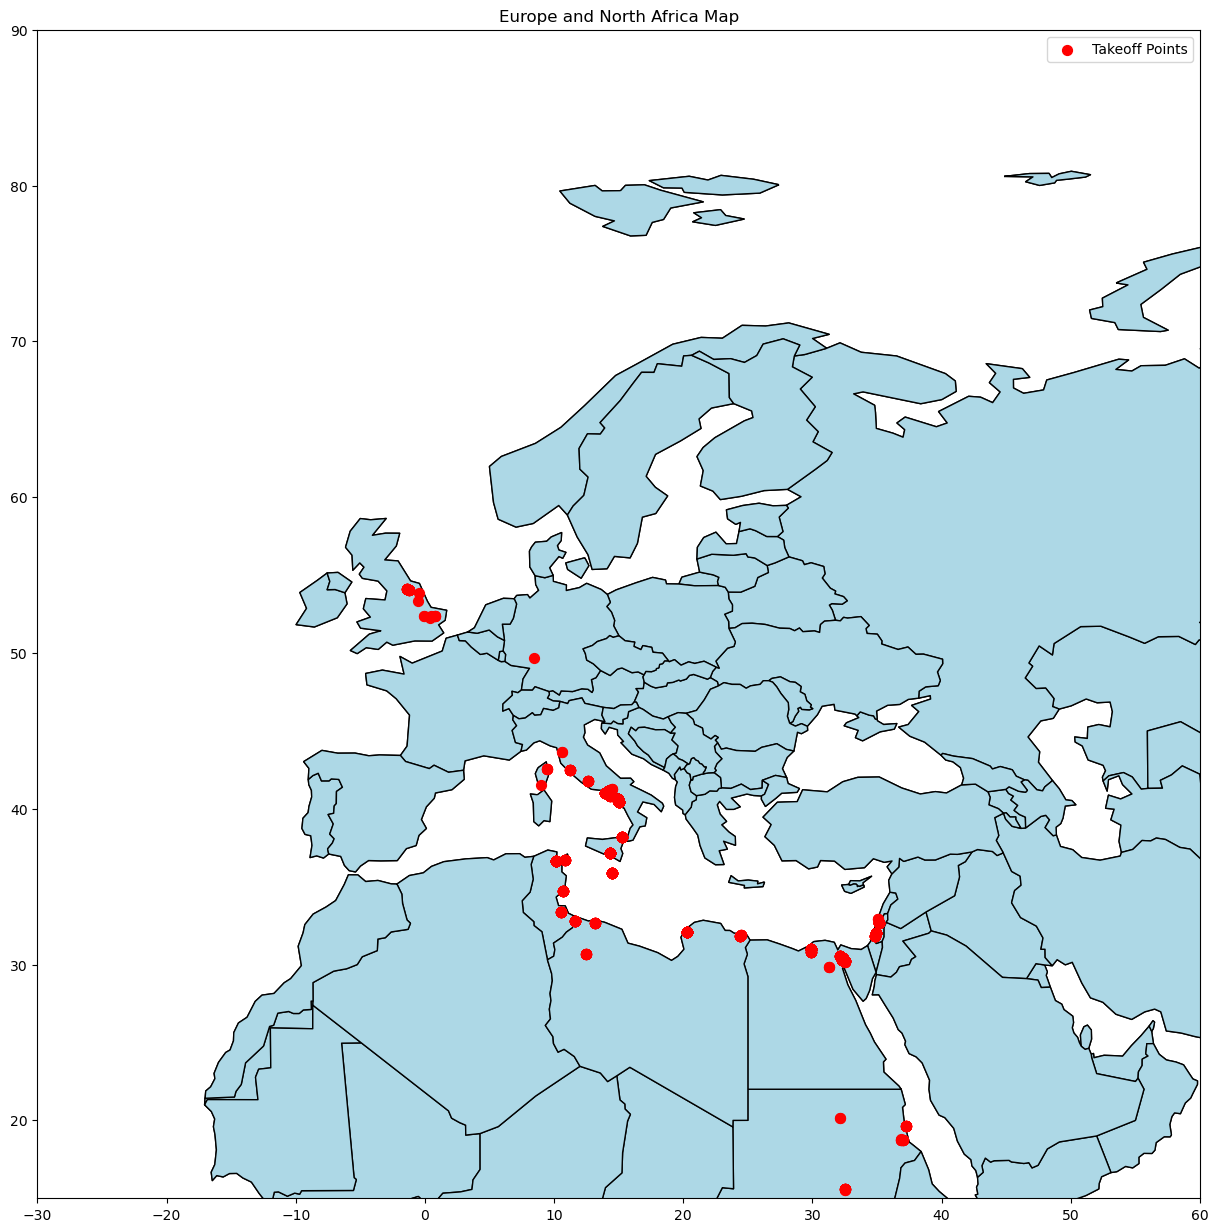

In [96]:
longitude_min, longitude_max = -30, 70  # Longitude range
latitude_min, latitude_max = -90, 90     # Latitude range

fig, ax = plt.subplots(figsize=(15, 16))
aerial_euafrica_raids = aerial[
    (aerial["Takeoff Longitude"] >= longitude_min) & 
    (aerial["Takeoff Longitude"] <= longitude_max) &
    (aerial["Takeoff Latitude"] >= latitude_min) & 
    (aerial["Takeoff Latitude"] <= latitude_max)
]

aerial_euafrica_raids = aerial[
    (aerial["Target Longitude"] >= longitude_min) & 
    (aerial["Target Longitude"] <= longitude_max) &
    (aerial["Target Latitude"] >= latitude_min) & 
    (aerial["Target Latitude"] <= latitude_max)
]


europe_north_africa.plot(ax=ax, color="lightblue", edgecolor="black")

# Plot takeoff points as triangles
ax.scatter(
    aerial_euafrica_raids["Takeoff Longitude"], 
    aerial_euafrica_raids["Takeoff Latitude"], 
    color="blue", marker="o", s=50, label="Takeoff Points", zorder=2
)

# Plot takeoff points as triangles
ax.scatter(
    aerial_euafrica_raids["Takeoff Longitude"], 
    aerial_euafrica_raids["Takeoff Latitude"], 
    color="red", marker="o", s=50, label="Takeoff Points", zorder=2
)

# Plot takeoff points as triangles
ax.scatter(
    aerial_euafrica_raids["Target Longitude"], 
    aerial_euafrica_raids["Target Latitude"], 
    color="blue", marker="o", s=50, label="Takeoff Points", zorder=2
)


# Set title and limits
ax.set_title("Europe and North Africa Map with Takeoff Coordinates")
ax.set_xlim(-30, 60)  # Longitude range
ax.set_ylim(15, 90)   # Latitude range

# Add legend
europe_north_africa.plot(ax=ax, color="lightblue", edgecolor="black")
ax.set_xlim(-30, 60)  # Longitude range
ax.set_ylim(15, 90)   # Latitude range
ax.set_title("Europe and North Africa Map")

plt.legend()
# Show the plot
plt.show()